In [1]:
#code for webscraping and data cleaning not included but is available on github
import pandas as pd
import numpy as np
import seaborn as sns
from dateutil.parser import parse
import matplotlib.pyplot as plt
sns.set()
plt.rcParams.update({'font.size': 22})

In [2]:
req_df = pd.read_excel("preprocessed game requirements.xlsx", header = [0,1], index_col = [0])
req_df = req_df.sort_values(by =('Game Info',"Release Date"))
comp_df = pd.read_excel("preprocessed computer builds.xlsx", index_col = [0])

In [3]:
"VIDEO GAME REQUIREMENTS ANALYSIS"
indexed_req = req_df.set_index(('Game Info', 'Release Date')).copy()
time_steps = pd.to_timedelta(np.arange(len(indexed_req)), 'S')
new_index = indexed_req.index + time_steps
indexed_req.index = new_index
indexed_req = indexed_req['2001-01-01':'2019-09-30']


In [5]:
min_gpu_df = indexed_req['Minimum','gpu_tex']
min_gpu_df = min_gpu_df.dropna()
rec_gpu_df = indexed_req['Recommended','gpu_tex']
rec_gpu_df = rec_gpu_df.dropna()
min_cpu_df = indexed_req['Minimum','flops']
min_cpu_df = min_cpu_df.dropna()
rec_cpu_df = indexed_req['Recommended','flops']
rec_cpu_df = rec_cpu_df.dropna()

In [6]:
"CPU AND GPU ANALYSIS"
cpu_df = pd.read_excel("./Component Databases/CPU Final DB.xlsx")
cpu_df['flops'] = cpu_df['CPU Min (GHz)']*cpu_df['Cores']*cpu_df['SP Flop Per Cycle2']
cpu_df = cpu_df.set_index("Released")
time_steps = pd.to_timedelta(np.arange(len(cpu_df)), 'S')
new_index = cpu_df.index + time_steps
cpu_df.index = new_index
cpu_df = cpu_df['2001-01-01':'2019-09-30']

In [7]:
def splitter(cell):
    val,mod = cell.split()
    mod_val = {"G":1,"M":1/1000}[mod[0]]
    return pd.to_numeric(val)*mod_val

gpu_df = pd.read_excel("./Component Databases/new gpu database.xlsx")
gpu_df = gpu_df[['Release Date', 'Texture Rate']]
gpu_df["Release Date"] = gpu_df[gpu_df['Release Date'].isin(["Unknown","Never Released"]) == False]
gpu_df = gpu_df.dropna()
gpu_df['Release Date'] = gpu_df["Release Date"].apply(parse, fuzzy=True)
gpu_df['Texture Rate'] = gpu_df['Texture Rate'].apply(splitter)
gpu_df['Texture Rate'] = pd.to_numeric(gpu_df['Texture Rate'])
gpu_df = gpu_df.set_index("Release Date")
time_steps = pd.to_timedelta(np.arange(len(gpu_df)), 'S')
new_index = gpu_df.index + time_steps
gpu_df.index = new_index
gpu_df = gpu_df['2001-01-01':'2019-09-30']

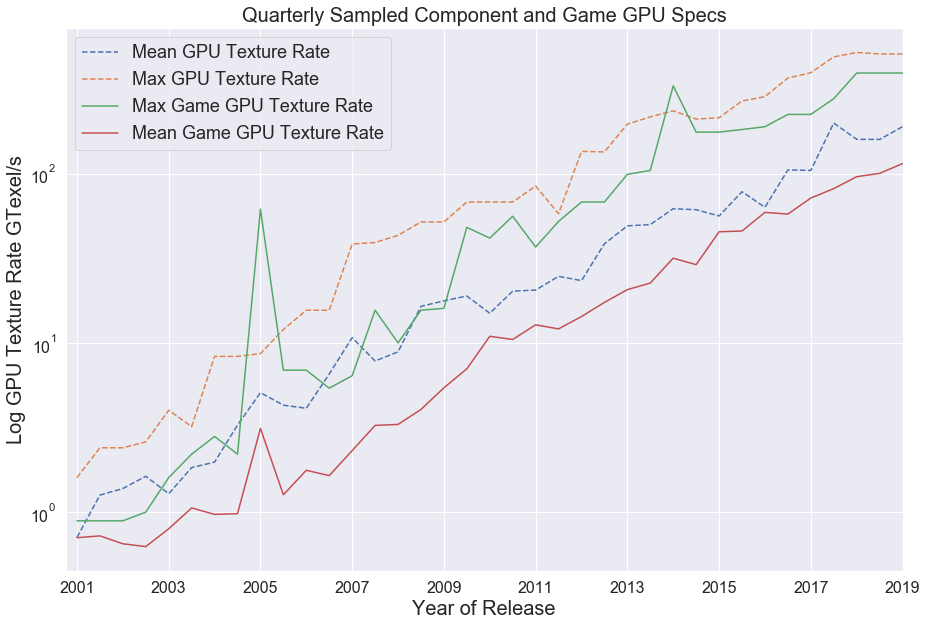

In [8]:
plt.figure(figsize = (15,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['xtick.labelsize'] =16
plt.rcParams['ytick.labelsize'] =16
period = "2BQ"
"BOTH GAME TEXTURE RATES ARE FROM RECOMMENDED REQUIREMENTS"
gpu_df['Texture Rate'].resample(period).mean().plot(label = "Mean GPU Texture Rate",style='--')
gpu_df['Texture Rate'].resample(period).max().plot(style='--', label = "Max GPU Texture Rate")
# min_gpu_df.resample(period).max().plot(label = "Max Minimum Req GPU Texture Rate")
rec_gpu_df.resample(period).max().plot(label = "Max Game GPU Texture Rate")
# min_gpu_df.resample(period).mean().plot(style='.',label = "Mean Minimum Req GPU Texture Rate")
rec_gpu_df.resample(period).mean().plot(style='-',label = "Mean Game GPU Texture Rate")
plt.legend(prop={'size': 18})
plt.yscale('log')
plt.ylabel("Log GPU Texture Rate GTexel/s")
plt.xlabel("Year of Release")
plt.title("Quarterly Sampled Component and Game GPU Specs", fontsize = 20)
plt.xlim('2000-12-01','2019-01-01')
plt.show()

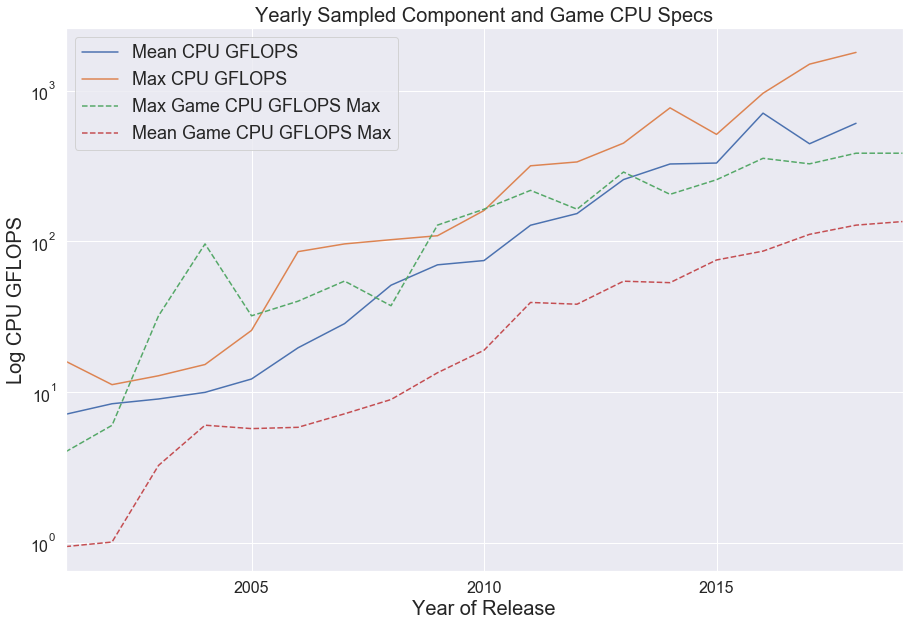

In [9]:
plt.figure(figsize = (15,10))
period = "Y"
cpu_df['flops'].resample(period).mean().plot(label = "Mean CPU GFLOPS")
cpu_df['flops'].resample(period).max().plot( label = "Max CPU GFLOPS")
# min_cpu_df.resample(period).max().plot(style='--', label = "Max Minimum Game CPU GFLOPS Max")
rec_cpu_df.resample(period).max().plot(style='--', label = "Max Game CPU GFLOPS Max")
# min_cpu_df.resample(period).mean().plot(style='.',label = "Mean Minimum Game CPU GFLOPS Max")
rec_cpu_df.resample(period).mean().plot(style='--',label = "Mean Game CPU GFLOPS Max")
plt.title("Yearly Sampled Component and Game CPU Specs", fontsize = 20)
plt.legend(prop={'size': 18})
plt.yscale('log')
plt.ylabel("Log CPU GFLOPS")
# plt.xlim('2000-12-01','2019-01-01')
plt.xlabel("Year of Release")
plt.show()